In [4]:
#Task 1 - Regression : Medical Insurance Cost Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# models for later demonstration (placeholders here)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# display options
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')

In [5]:
#Load dataset and preview
df = pd.read_csv("insurance.csv")   # change path if needed

#Checking for NUmber of samples
print("Shape:", df.shape)
display(df.head())

Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Checking for non-numeric features
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Checking for duplicates and missing values
print("\n--- Data Quality Check ---")
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())


--- Data Quality Check ---
Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of duplicate rows: 1


In [8]:
# Basic descriptive statistics
print("\n--- Descriptive Statistics ---")
display(df.describe())

# Logical range checks
print("\n--- Logical Range Checks ---")
print("Age range:", df['age'].min(), "to", df['age'].max())
print("BMI range:", df['bmi'].min(), "to", df['bmi'].max())
print("Charges range:", df['charges'].min(), "to", df['charges'].max())

# Check if categorical columns contain valid categories
print("\n--- Unique Values in Categorical Columns ---")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


--- Descriptive Statistics ---


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



--- Logical Range Checks ---
Age range: 18 to 64
BMI range: 15.96 to 53.13
Charges range: 1121.8739 to 63770.42801

--- Unique Values in Categorical Columns ---
sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']



Average charges by smoker status:
 smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Correlation between age and charges: 0.30


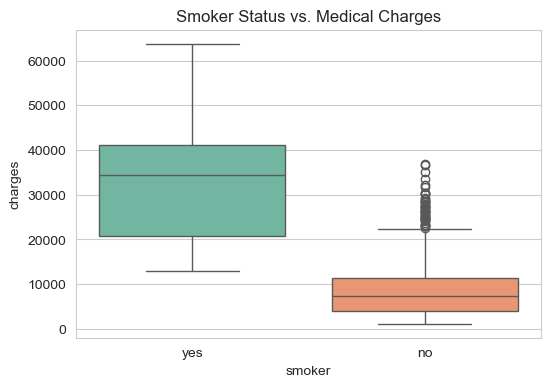

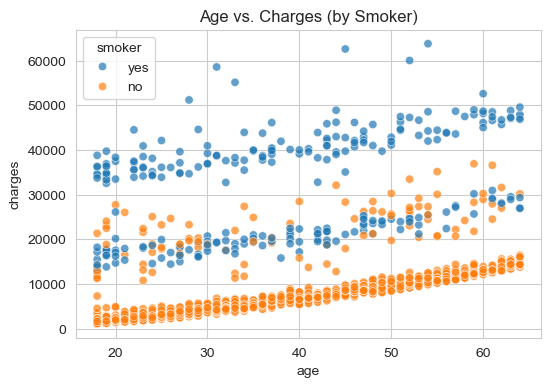

In [14]:
# Do smokers have higher average medical charges?
smoker_charges = df.groupby('smoker')['charges'].mean()
print("\nAverage charges by smoker status:\n", smoker_charges)

# Do older people have higher charges on average?
age_charges_corr = df[['age', 'charges']].corr().iloc[0,1]
print(f"\nCorrelation between age and charges: {age_charges_corr:.2f}")

# Visualize key relationships
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='smoker', y='charges', hue='smoker', palette='Set2', legend=False)
plt.title("Smoker Status vs. Medical Charges")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', alpha=0.7)
plt.title("Age vs. Charges (by Smoker)")
plt.show()

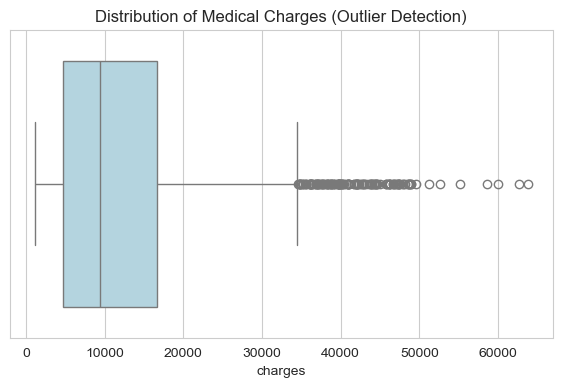

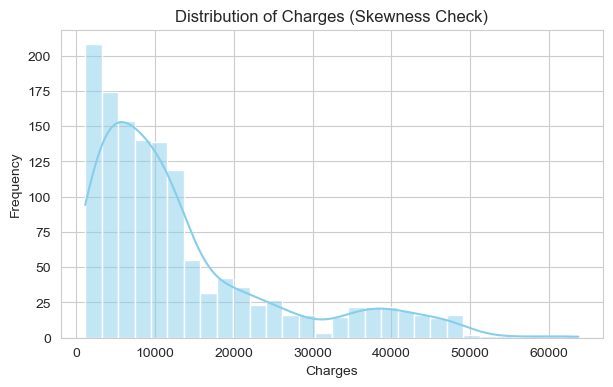


Skewness: 1.5158796580240388
Kurtosis: 1.6062986532967907


In [15]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['charges'], color='lightblue')
plt.title("Distribution of Medical Charges (Outlier Detection)")
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(df['charges'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Charges (Skewness Check)")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# Skewness and Kurtosis
print("\nSkewness:", df['charges'].skew())
print("Kurtosis:", df['charges'].kurt())

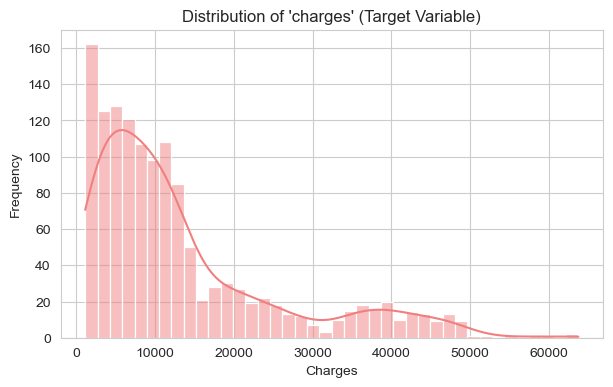

Skewness: 1.52
Kurtosis: 1.61

--- Quantile Summary ---
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
90%      34831.719700
95%      41181.827787
99%      48537.480726
max      63770.428010
Name: charges, dtype: float64

Samples in top 10% high-cost range: 134 (10.0%)


In [16]:
#Identify imbalances
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution of target variable
plt.figure(figsize=(7,4))
sns.histplot(df['charges'], bins=40, kde=True, color='lightcoral')
plt.title("Distribution of 'charges' (Target Variable)")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# Check skewness and kurtosis
skewness = df['charges'].skew()
kurtosis = df['charges'].kurt()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# Quantile summary to inspect imbalance
print("\n--- Quantile Summary ---")
print(df['charges'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# Count how many are in top 10% of charges
threshold_90 = df['charges'].quantile(0.9)
top_10_pct = (df['charges'] > threshold_90).sum()
print(f"\nSamples in top 10% high-cost range: {top_10_pct} ({top_10_pct/len(df)*100:.1f}%)")

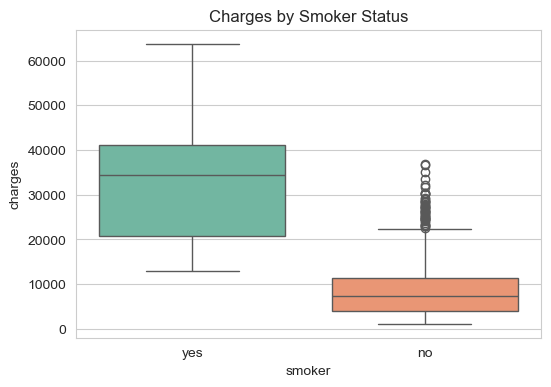

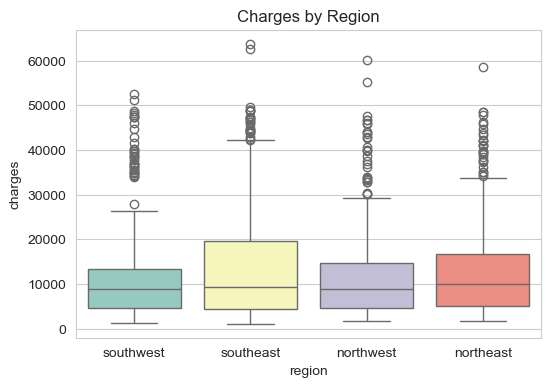

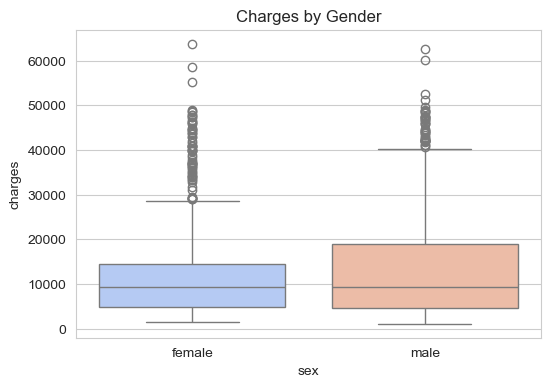

In [18]:
#Visualise imbalance in categories
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='smoker', y='charges', hue='smoker', palette='Set2', legend=False)
plt.title("Charges by Smoker Status")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='region', y='charges', hue='region', palette='Set3', legend=False)
plt.title("Charges by Region")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='sex', y='charges', hue='sex', palette='coolwarm', legend=False)
plt.title("Charges by Gender")
plt.show()


--- Distribution of cost categories ---
cost_category
Low       446
Medium    446
High      446
Name: count, dtype: int64


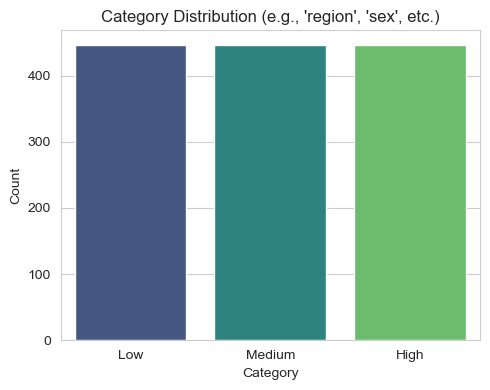

In [19]:
#Categorise target into bins to measure severity
# Bin target into low, medium, and high-cost groups (based on quantiles)
df['cost_category'] = pd.qcut(df['charges'], q=3, labels=['Low', 'Medium', 'High'])

# Count distribution per bin
category_counts = df['cost_category'].value_counts().sort_index()
print("\n--- Distribution of cost categories ---")
print(category_counts)

# Visualize imbalance
plt.figure(figsize=(5,4))
sns.barplot(
    x=category_counts.index,
    y=category_counts.values,
    hue=category_counts.index,
    palette='viridis',
    legend=False
)
plt.title("Category Distribution (e.g., 'region', 'sex', etc.)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

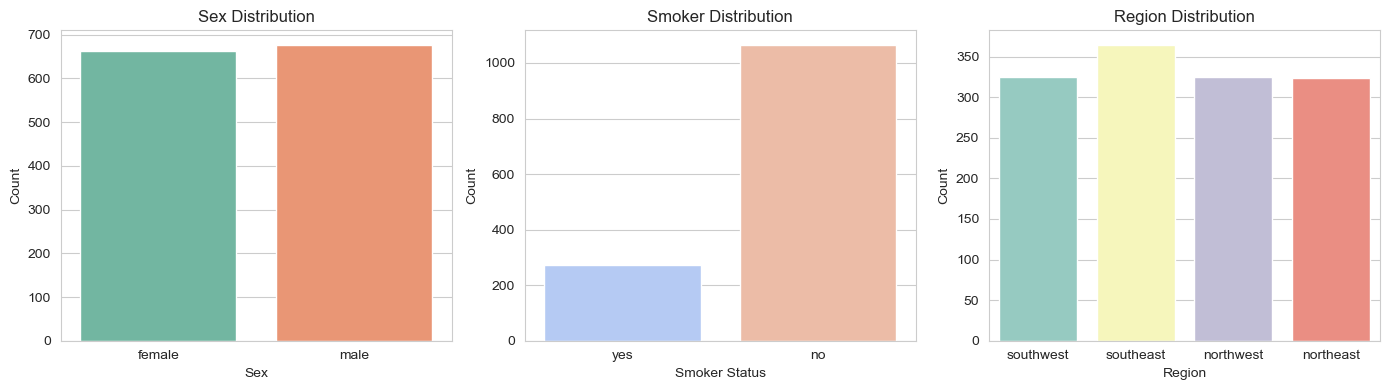

,Category,Unique Values,Most Frequent Value,Most Frequent Count,Least Frequent Count,Imbalance Ratio (Max/Min)
0,sex,2,male,676,662,1.02
1,smoker,2,no,1064,274,3.88
2,region,4,southeast,364,324,1.12


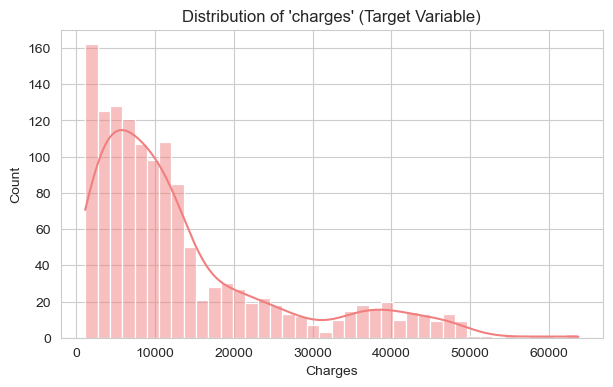

Skewness of 'charges': 1.51
➡️ The distribution is highly right-skewed (imbalance towards lower charges).


In [20]:
plt.figure(figsize=(14,4))

# Sex distribution
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='sex', hue='sex', palette='Set2', legend=False)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

# Smoker distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='smoker', hue='smoker', palette='coolwarm', legend=False)
plt.title("Smoker Distribution")
plt.xlabel("Smoker Status")
plt.ylabel("Count")

# Region distribution
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='region', hue='region', palette='Set3', legend=False)
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Count proportions for each categorical feature
cat_features = ['sex', 'smoker', 'region']
imbalance_summary = pd.DataFrame({
    'Category': cat_features,
    'Unique Values': [df[col].nunique() for col in cat_features],
    'Most Frequent Value': [df[col].value_counts().idxmax() for col in cat_features],
    'Most Frequent Count': [df[col].value_counts().max() for col in cat_features],
    'Least Frequent Count': [df[col].value_counts().min() for col in cat_features],
    'Imbalance Ratio (Max/Min)': [
        round(df[col].value_counts().max() / df[col].value_counts().min(), 2)
        for col in cat_features
    ]
})

display(imbalance_summary)

plt.figure(figsize=(7,4))
sns.histplot(df['charges'], bins=40, kde=True, color='lightcoral')
plt.title("Distribution of 'charges' (Target Variable)")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

# Calculate skewness
from scipy.stats import skew
charges_skew = skew(df['charges'])
print(f"Skewness of 'charges': {charges_skew:.2f}")

# Interpretation
if charges_skew > 1:
    print("➡️ The distribution is highly right-skewed (imbalance towards lower charges).")
elif charges_skew > 0.5:
    print("➡️ The distribution is moderately right-skewed.")
else:
    print("➡️ The distribution is fairly symmetric.")

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# --- STEP 1: Prepare your dataset ---
# Let's say you want to predict 'smoker' (classification example)
X = df.drop('smoker', axis=1)
y = df['smoker']

# Encode categorical columns in X
X_encoded = pd.get_dummies(X, drop_first=True)

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Encode y if it's categorical ('yes'/'no')
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# --- STEP 2: Apply SMOTE ---
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train_enc)

print("Before SMOTE:")
print(pd.Series(y_train_enc).value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_res).value_counts())


Before SMOTE:
0    850
1    220
Name: count, dtype: int64

After SMOTE:
0    850
1    850
Name: count, dtype: int64


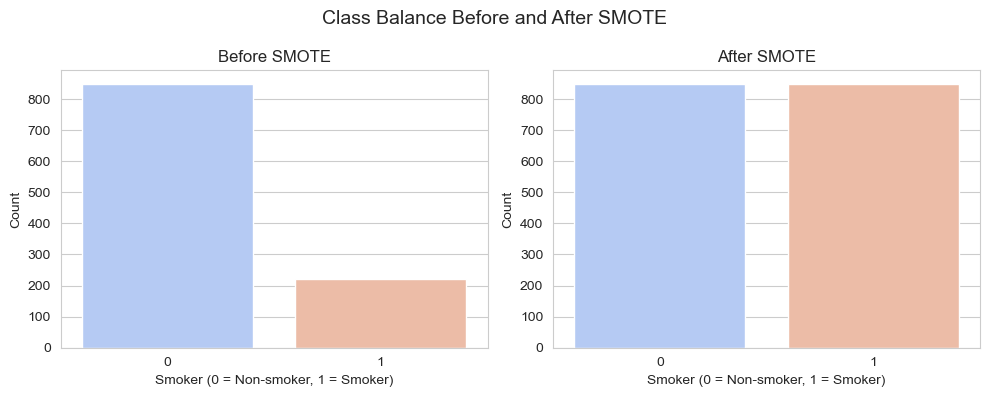

In [24]:
#Visualize imbalance before and after SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Step 1: Encode the target variable (smoker)
le = LabelEncoder()
y_enc = le.fit_transform(df['smoker'])  # 'no' -> 0, 'yes' -> 1

# Step 2: Prepare features (excluding 'smoker')
X = df.drop('smoker', axis=1)
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to fix imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Step 5: Create side-by-side comparison plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Before SMOTE
sns.countplot(x=y_train, hue=y_train, ax=axes[0], palette='coolwarm', legend=False)
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Smoker (0 = Non-smoker, 1 = Smoker)")
axes[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_res, hue=y_res, ax=axes[1], palette='coolwarm', legend=False)
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Smoker (0 = Non-smoker, 1 = Smoker)")
axes[1].set_ylabel("Count")

plt.suptitle("Class Balance Before and After SMOTE", fontsize=14)
plt.tight_layout()
plt.show()

In [25]:
#Splitting the data
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
#Model Evaluation : Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Performance:
MAE: 1083.9861323119405
RMSE: 2683.4955708863695
R2 Score: 0.9536154117990436


In [68]:
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df.drop('charges', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['charges']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [76]:
# Model evaluation : MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Train a Neural Network (MLP Regressor)
nn_model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                        max_iter=3000, random_state=42)
nn_model.fit(X_train, y_train)

# Predictions
y_pred_nn = nn_model.predict(X_test)

# Performance metrics for Neural Network
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print("🔹 Neural Network Performance:")
print(f"MAE: {mae_nn:.2f}")
print(f"RMSE: {rmse_nn:.2f}")
print(f"R²: {r2_nn:.4f}")

🔹 Neural Network Performance:
MAE: 1747.21
RMSE: 3238.16
R²: 0.9325


In [72]:
# Ensemble Model (Stacking Regressor)
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Base Models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)),
    ('svr', make_pipeline(StandardScaler(), SVR(C=10, kernel='rbf')))
]

# Meta Model (final combiner)
meta_model = LinearRegression()

# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the model
stacking_model.fit(X_train, y_train)

# Predict
y_pred_stack = stacking_model.predict(X_test)

# Evaluate
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)

print("Stacking Ensemble Model Performance:")
print(f"MAE: {mae_stack:.2f}")
print(f"RMSE: {rmse_stack:.2f}")
print(f"R² Score: {r2_stack:.3f}")

Stacking Ensemble Model Performance:
MAE: 1141.97
RMSE: 2561.88
R² Score: 0.958


In [78]:
# Compare Model Performances
results = {
    'Random Forest': [mae_rf, rmse_rf, r2_rf],
    'Neural Network': [mae_nn, rmse_nn, r2_nn],
    'Stacking Ensemble': [mae_stack, rmse_stack, r2_stack]
}

import pandas as pd
comparison = pd.DataFrame(results, index=['MAE', 'RMSE', 'R²']).T
print("\nModel Comparison Summary:")
display(comparison)


Model Comparison Summary:


,MAE,RMSE,R²
Random Forest,1083.986132,2683.495571,0.953615
Neural Network,1747.213461,3238.160543,0.932459
Stacking Ensemble,1141.965119,2561.877255,0.957725
